Proteins are biomolecules that perform many critical functions in living organisms. A protein molecule is composed of a certain sequence of amino acids, which makes it fold into a specific 3D structure that determines the protein's activity. The processes of protein folding and unfolding are fundamental biological events ,yet they are poorly understood by scientists.

Many proteins participate in biological processes that involve mechanical forces (e.g., muscle contraction). Throughout these events, a protein molecule suffers mechanical perturbation: the mechanical force pulls on the protein and unfolds it (see a schematic image below). Different protein molecules exhibit different mechanical properties that determine the force magnitudes to which the proteins respond, a feature which is intimately connected to their function and is crucial for the processes they are involved in. (The picture below is taken from https://commons.wikimedia.org/wiki/File:Protein_folding_schematic.png)

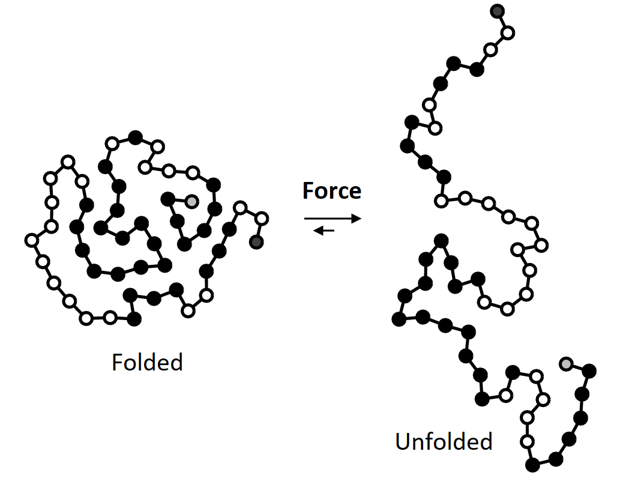

The development of single molecule force spectroscopy techniques has enabled scientists to apply forces (of a piconewton (pN) magnitude) to unfold individual protein molecules. This kind of experiments can be used to characterise the energy landscape of protein folding and its response to mechanical stress, a biologically important stimulus.

In this project, I used a single molecule technique - magnetic tweezers - to apply different forces to individual protein molecules and measured how much time is needed for a protein to unfold. Then, I used this data to extract protein unfolding energy landscape parameters by applying two theoretical models. I conclude that one of the two models can better predict the velocity at which the protein unfolds.

I measured times needed for the protein to unfold (let me call them 'unfolding times' below) and calculated their natural logarithms. I stored this data in the 'unfold_times.csv' file. I import this file as a data frame below. You can see that I collected unfolding time samples at eleven different forces (from 5 to 30 pN):

In [1]:
import pandas as pd 

# Import log(unfolding time) data at different forces 
unfold = pd.read_csv('unfold_times.csv')

unfold.head()

,30pN,20pN,15pN,12pN,10pN,7.5pN,7pN,6.5pN,6pN,5.5pN,5pN
0,-3.87511,-2.42889,-1.038460,-0.719861,-2.675850,3.64459,4.41995,1.30733,1.92527,4.658330,3.28586
1,-4.31954,-2.80434,-0.891208,-0.500397,-2.965900,4.40413,-2.00128,1.12529,2.07608,2.658720,2.09278
2,-3.99145,-3.13038,-2.682980,-2.477130,-0.308565,2.88661,4.73367,-2.78834,5.04599,0.707789,4.18110
3,-4.98557,-4.08364,-1.920870,-0.386118,0.430548,2.96361,2.24420,-2.71197,4.82033,3.542870,4.15189
4,-4.03419,-3.40512,-1.221050,-2.195260,0.007770,4.24714,2.52450,NaN,3.72109,0.191199,2.98830


To explore how the unfolding time of the protein is affected by the magnitude of the applied force, below I plot and compare the histograms of the obtained unfolding time values in a logarithmic scale.

Text(0.5, 0, 'log(unfold. time)')

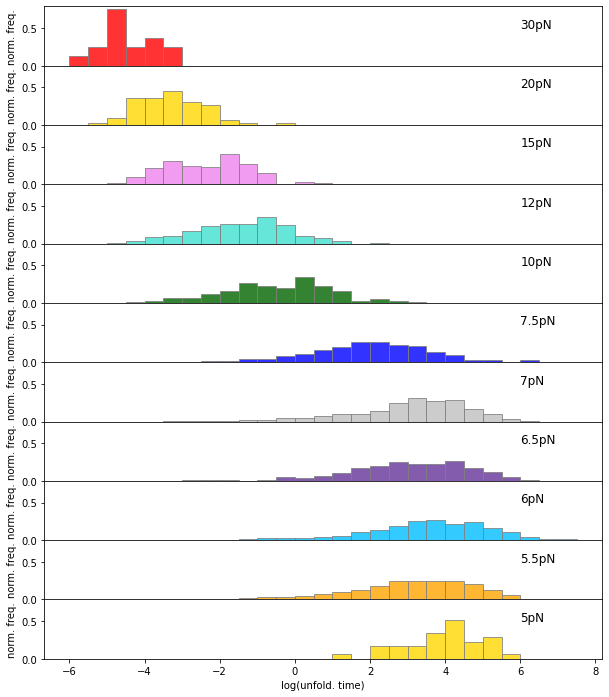

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Creating a list with histogram colors 
col_l=["red","gold","violet","turquoise","darkgreen","blue","silver","rebeccapurple","deepskyblue","orange","gold"]

#Creating a list with unfold DataFrame columns names
col_n=list(unfold.columns)


# Ploting unfolding time histograms for different forces (from highest to lowest)
fig, f = plt.subplots(11,1,sharex=True,sharey=True,figsize=(10,12))
for i in range(11):
   f[i].hist(unfold.iloc[:,i],bins=np.arange(-6, 7.5 + 0.5, 0.5),color=col_l[i],density=True, alpha=0.8,edgecolor='grey')
   f[i].annotate(col_n[i],xy=(6, 0.5),fontsize=12)

fig.subplots_adjust(hspace=0)
#fig.suptitle('Unfolding time distributions for different forces',fontsize=16)
#setting y axis labels
for axis in f:
    axis.set_ylabel("norm. freq.")
    
plt.xlabel('log(unfold. time)')

As you can see, at the highest force (F=30 pN, red histogram), the unfolding time is the shortest (log. (unfolding time) is approximately -5). Thus, pulling on a protein at a high force results in a fast breakage of the protein's 3D structure.

As the applied force decreases, the time needed to unfold the protein drastically increases. This noticeable increment in the unfolding time can be observed as the force decreases from 30 to 7 pN. When we decreased the force by 0.5-2 pN, we cannot see any evident increment in the unfolding force.

Protein unfolding follows the frist order kinetics (the rate of the protein unfolding reaction depends on the concentartion of only one reactant- the protein itself): hence, the unfolding times should be exponentially distributed. To presicely estimate the log(average unfolding times) corresponding to the positions of the hitogram peaks, I will need to fit the histograms with an exponential probability density function. To do this, I need to save the frequency vs. log.(unfolding time data) into a data frame. Note that I will save the data from non-normalized histograms.

In [3]:
#Save histogram data 
hist_data=[]
for i in range(11):
    counts, bin_edges = np.histogram(unfold.iloc[:,i],bins=np.arange(-7.5, 8 + 0.5, 0.5))
    hist_data.append(counts) 
hist_data.append(bin_edges[0:31])

#transpose the data to obtain a data frame in which each column corresponds to a particular histogram
hist_data=pd.DataFrame(hist_data).T
hist_data.columns=['30pN','20pN','15pN','12pN','10pN','7.5pN','7pN','6.5pN','6pN','5.5pN','5pN','log(time)']
hist_data.head(15)

,30pN,20pN,15pN,12pN,10pN,7.5pN,7pN,6.5pN,6pN,5.5pN,5pN,log(time)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.5
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0
4,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.5
5,6.0,9.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0
6,2.0,32.0,11.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.5
7,3.0,32.0,23.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0
8,2.0,41.0,33.0,14.0,8.0,1.0,2.0,0.0,0.0,1.0,0.0,-3.5
9,0.0,28.0,26.0,22.0,8.0,1.0,2.0,2.0,1.0,6.0,0.0,-3.0


Now, I will fit the histograms with a probability density function and I will save the obtained peak values in a separate data frame 'hist_fit_param'.

In [4]:
#######Fits to histograms################
#I will store fit parameters in hist_fit_param data frame
from scipy.optimize import curve_fit

# define the objective function to fit the unfolding time histograms
def objective(x, A, b):
    return A*np.exp(x-b-np.exp(x-b))

#Creating a DataFrame in which we will store the fits parameters
hist_fit_param=np.array([0,0])
hist_fit_param=pd.DataFrame(hist_fit_param).T

hist_data=hist_data.values #  -- NEEDS TO BE UNCOMMENTED WHEN RUN FOR THE FIRST TIME
# choose the input and output variables
for i in range(11):
    x, y = hist_data[:,11], hist_data[:,i]
     # curve fit
    popt, _ = curve_fit(objective, x, y)
     # summarize the parameter values a
    A,b=popt
    popt=pd.DataFrame(popt).T
     #concatenate the parameters to the hist_fit_param DataFrame
    hist_fit_param=pd.concat([hist_fit_param,popt])

#Deleting the first row of the hist_fit_param DataFrame
hist_fit_param=hist_fit_param.iloc[1:]

#Adding labels identifying each parameter of the fit 
hist_fit_param.columns=['A','log(unfold. time)']#log(unfold. time) are the fit peak values
hist_fit_param.index=['30pN','20pN','15pN','12pN','10pN','7.5pN','7pN','6.5pN','6pN','5.5pN','5pN']

print(hist_fit_param)

                A  log(unfold. time)
30pN     9.461667          -4.507886
20pN    99.016130          -3.369746
15pN   104.716921          -2.161092
12pN   122.305230          -1.211552
10pN   106.276218          -0.176001
7.5pN  147.098191           2.247093
7pN    434.762773           3.533950
6.5pN  243.701248           3.513466
6pN    509.455664           3.954228
5.5pN  915.339394           3.616641
5pN     18.479777           4.108157


Let me now plot the log(unfolding time) histograms for different forces together fith the simulated fir curves:

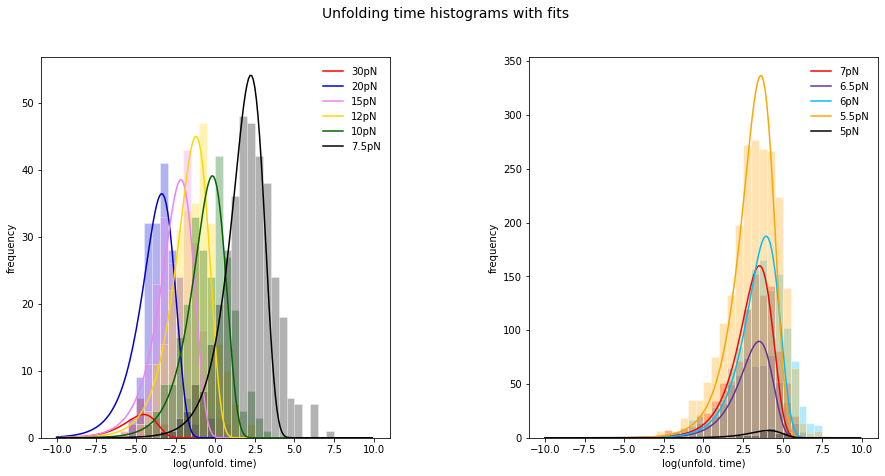

In [5]:
####Here I will plot the log(unfold. time) histograms with the plots mapping the fits to the histograms
#####Simulate the curve fitting the histogram################

#Creating a list with histogram colors 
col_l=["red","mediumblue","violet","gold","darkgreen","black","red","rebeccapurple","deepskyblue","orange","black"]

#Creating a list containing the column names of the hist_fits DataFrame
col_n2=list(hist_fit_param.columns)

### Ploting unfolding time histograms for different forces########

# Two subplots spl[0] for data at 7.5-30 pN; spl[1] for data at 5-7 pN
f, spl = plt.subplots(1,2, figsize=(15,7))

#The first subplot (spl[0],on the left) contains data corresponding to the upper force range (7.5-30 pN).
#At these forces, unfolding velocity changes fast with the force increment
for i in range(6):
    spl[0].hist(unfold.iloc[:,[i]],bins=np.arange(-10, 10 + 0.5, 0.5),color=col_l[i],alpha=0.3,edgecolor='white')
    #adding correspondig fits to the histograms
    x3 =  np.arange(-10,10,0.1)
    y3 = hist_fit_param.iloc[i,0]*np.exp(x3-hist_fit_param.iloc[i,1]-np.exp(x3-hist_fit_param.iloc[i,1]))
    spl[0].plot(x3,y3,color=col_l[i],label=hist_fit_param.index[i])
    spl[0].legend(frameon=False)
    
#The second subplot (spl[1],on the right) contains data corresponding to the lower force range(from 5 to 7 pN).
#At these forces, unfolding velocity changes slowly with the force increment
for i in range(6,11):
    spl[1].hist(unfold.iloc[:,[i]],bins=np.arange(-10, 10 + 0.5, 0.5),color=col_l[i],alpha=0.3,edgecolor='white')
    #adding correspondig fits to the histograms
    x3 =  np.arange(-10,10,0.1)
    y3 = hist_fit_param.iloc[i,0]*np.exp(x3-hist_fit_param.iloc[i,1]-np.exp(x3-hist_fit_param.iloc[i,1]))
    spl[1].plot(x3,y3,color=col_l[i],label=hist_fit_param.index[i])
    spl[1].legend(frameon=False)

#Setting x and y axes labels
for axis in spl:
    axis.set_xlabel("log(unfold. time)")
    axis.set_ylabel("frequency")
    
#Setting the title for the figure    
plt.suptitle('Unfolding time histograms with fits',fontsize=14)

# Adjusting space between the two subplots
plt.subplots_adjust(wspace=0.4) 

Look at the sublot on the left. We can clearly see that with the decrease of the force from 30 to 7.5 pN the log(unfolding times) distributions displace towards longer times (from log(unfolding time)=-4.5 at 30 pN to log(unfolding time)=2.25 at 7.5).

On the other hand, at lower forces (from 7.5 to 5 pN), the increment in log(unfolding time) slows down. As we can see, in this range of forces, the values of log(unfolding times) oscillate around 3.5-4, although the overall trend is towards the increment of these values with the decrease of the force.

Using the values of log(unfolding time) rendered by the fits, I can calculate the velocity of protein unfolding for each force. The natural logarithm of the unfolding velocity can be found as follows: log(velocity)=-log(unfolding time)).

Let me save the log_velocity values calculated as I indicated above in a separate data frame:

In [6]:
####Creating a DataFrame containing unfolding velocities and  corresponding forces
#The natural logarithm of the unfolding velocity can be found as follows: log(velocity)=-log(unfolding time))
unf_velocities=np.array([30,20,15,12,10,7.5,7,6.5,6,5.5,5])
unf_velocities=pd.DataFrame(unf_velocities)

unf_velocities.index=['30pN','20pN','15pN','12pN','10pN','7.5pN','7pN','6.5pN','6pN','5.5pN','5pN']

unf_velocities= pd.concat([unf_velocities, hist_fit_param['log(unfold. time)']],axis=1,join='inner')
unf_velocities['log(unfold. time)']=-unf_velocities['log(unfold. time)']
unf_velocities.columns=['force','log_velocity']

print(unf_velocities)

       force  log_velocity
30pN    30.0      4.507886
20pN    20.0      3.369746
15pN    15.0      2.161092
12pN    12.0      1.211552
10pN    10.0      0.176001
7.5pN    7.5     -2.247093
7pN      7.0     -3.533950
6.5pN    6.5     -3.513466
6pN      6.0     -3.954228
5.5pN    5.5     -3.616641
5pN      5.0     -4.108157


I can now try to predict how the velocity of protein unfolding changes with the pulling force with a linear regression model.

The increment of bond dissociation rate under force can be explained by an extension of the chemical reaction transition state theory, according to which the applied force acts on the protein along the unfolding reaction coordinate and tilts the energy landscape of the protein unfolding reaction (see figure below).

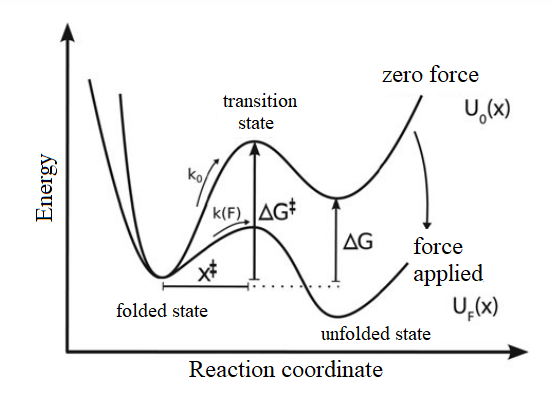

According to this theory, the unfolding velocity changes exponentially with force,and the natural logarithm of the unfolding velocity will depend linearly on force:

 log(velocity)=log(velocity(0))+(Xts*force)/kT, 

where   velocity(0) is the unfolding velocity in the absence of force, Xts is the position of the transition state, k is the Boltzmann constant and T is the absolute temperature.

As you can see, by analysing and modelling the change of the unfolding velocity with force, I can extract some interesting characteristics of the protein unfolding, i.e., I can predict at which velocity the protein unfolds in the absence of force, and I can determine the position of the transition state. 

Let me build a liner regression model m1, in which log(velocity) will be the dependent variable and it will depend linearly on force. 

Intercept   -5.231919
force        0.385573
dtype: float64


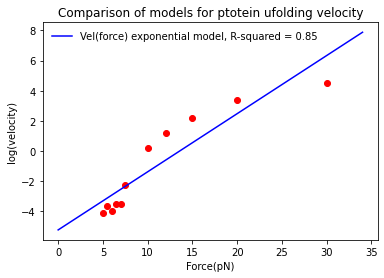

In [7]:
import statsmodels.formula.api as sm 

#This function finds the lowest non-zero number in the array and replaces all zeroes by a number lower than the lowest
def replaceZeroes(data):
  min_nonzero = np.min(data[np.nonzero(data)])
  data[data == 0] = min_nonzero
  return data

####m1 : Velocity ~ Force exponential model####################
results_m1=sm.ols('log_velocity ~ force', data=unf_velocities).fit()

#Saving parameters for the m1(lienear model)
parameters_m1=results_m1.params
r_sq1=results_m1.rsquared

print(results_m1.params)
#####Simulate m1 fit curve###############
# Create the vectors X and Y:

x1 =  np.array(range(0,35))
y1 = parameters_m1['force']*x1+parameters_m1['Intercept']

# Create the plot of the linear model (m1):
plt.plot(x1,y1,'-b',label="Vel(force) exponential model, R-squared = "+str(r_sq1.round(2)))
plt.legend(loc='upper left', frameon=False)

#Plot the ln(k) (Unfolding kinetics data)
plt.scatter(unf_velocities['force'],unf_velocities['log_velocity'],c='red')
plt.xlabel('Force(pN)')
plt.ylabel('log(velocity)')
plt.title('Comparison of models for ptotein ufolding velocity')
plt.rcParams["figure.figsize"]=(9,5)

As you can see, this model cannot accurately predict the log(velocity) values (R-squared is only 0.85). E.g., we can clearly see that at high forces (20-30 pN), the log(velocity) values start to increase slower than they increased in the range of 7-15 pN. 

The problem here is that the model m1, in which the unfolding velocity exponentially icreases with the applied force (or natural logarithm of the velocity linarly increases with the force), does not take into account that the position of the transition state (Xts) decreases with the applied force,thus, making the transition rate (in our case, from folded state of the protein to unfolded state) less dependent on force.

In addition, due to the application of force not only a position of the barrier (or transition state) changes, it also results in the lowering of the barrier height. Upon reaching some critical force, this barrier can disappear at all. 

This situation can be better explained by a model, in which the log(velocity) can be found from a polynomial containing a term with the natural logarithm of force and a term with the force to the 3/2 power (for the details see: DOI: 10.1103/PhysRevLett.96.108101).

Let me now find the parameters of this alternative model (m2) by fitting it to our data.

In [8]:
####m2: the alternative model###############
results_m2=sm.ols('log_velocity ~ np.log(force)+np.power(force, 1.5)', data=unf_velocities).fit()

#Saving parameters for the alternative m2
parameters_m2=results_m2.params
r_sq2=results_m2.rsquared

print(results_m2.params)

Intercept              -16.311212
np.log(force)            7.310081
np.power(force, 1.5)    -0.024279
dtype: float64


To compare the two models, m1 and m2, I will plot the simulated curves of the two models together with the log(velocity) data and the R-squared of the models.

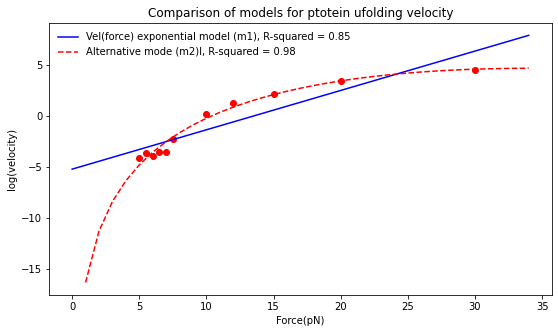

In [9]:
#####Simulate m1 fit curve###############
# Create the vectors X and Y:

x1 =  np.array(range(0,35))
y1 = parameters_m1['force']*x1+parameters_m1['Intercept']

# Create the plot of the linear model (m1):
plt.plot(x1,y1,'-b',label="Vel(force) exponential model (m1), R-squared = "+str(r_sq1.round(2)))

#####Simulate m2 fit curve###############
# Create the vectors X and Y:

x2 =  replaceZeroes(np.array(range(0,35)))#this is done in order to avoid applying np.log() over x2=0 when computing y2
y2 = parameters_m2['np.log(force)']*np.log(x2)+parameters_m2['np.power(force, 1.5)']*np.power(x2, 1.5)+parameters_m2['Intercept']

# Create the plot of the alternative model (m2):
plt.plot(x2,y2,'--r',label="Alternative mode (m2)l, R-squared = "+str(r_sq2.round(2)))

plt.legend(loc='upper left', frameon=False)


#Plot the ln(k) (Unfolding kinetics data)
plt.scatter(unf_velocities['force'],unf_velocities['log_velocity'],c='red')
plt.xlabel('Force(pN)')
plt.ylabel('log(velocity)')
plt.title('Comparison of models for ptotein ufolding velocity')
plt.rcParams["figure.figsize"]=(9,5)

As you can see, the alternative model m2 can better predict the unfolding velocity of the protein (R-squared for m2 is 0.98, whereas the R-squared for the model m1 is 0.85) .

Remember that using the model fit parameters it is possible to determine a very interesting characteristics of the unfolding of our protein: one can calculate the protein unfolding velocity in the absense of force as exp(Intercept), since the intercept of the fit is the natural logarithm of the unfolding velocity at F=0.

One can also determine the height of the energetic barrier and the position of the transition state in the absense of force as these parameters are defined by the coefficients in front of log(force) and (force)<sup>3/2</sup>.